In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"

In [4]:
sales1 = pd.read_pickle("../Data/total_sales_09-10_cleaned.pkl")
sales2 = pd.read_pickle("../Data/total_sales_10-11_cleaned.pkl")

In [5]:
sales = pd.concat([sales1, sales2])

In [6]:
sales.head(10)

,date,weekday,hour,total_amount
0,2009-12-01,Tuesday,7,651.10
1,2009-12-01,Tuesday,9,4597.93
2,2009-12-01,Tuesday,10,4238.66
3,2009-12-01,Tuesday,11,4597.01
4,2009-12-01,Tuesday,12,8238.81
5,2009-12-01,Tuesday,13,5134.44
6,2009-12-01,Tuesday,14,2147.15
7,2009-12-01,Tuesday,15,906.15
8,2009-12-01,Tuesday,16,2314.59
9,2009-12-01,Tuesday,17,2734.08


In [8]:
sales_day = sales.groupby(['date']).sum().reset_index()
sales_day = sales_day.drop(columns = ['hour'])
sales_day.head()

,date,total_amount
0,2009-12-01,37366.32
1,2009-12-02,45644.67
2,2009-12-03,66327.53
3,2009-12-04,31448.44
4,2009-12-05,9042.36


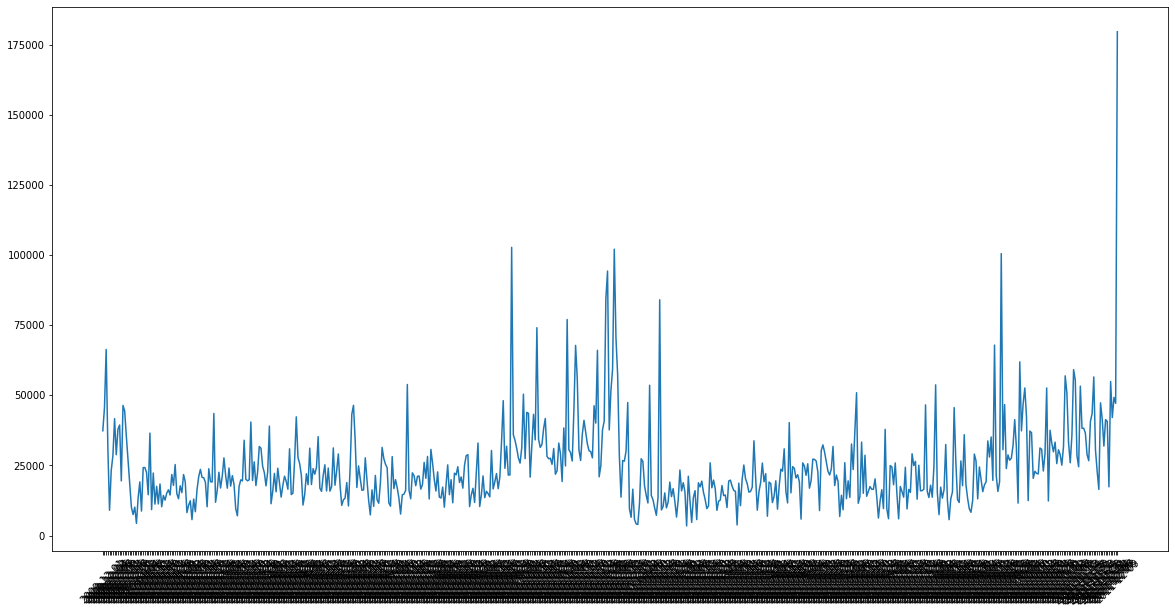

In [25]:
plt.figure(figsize=(20,10))
plt.plot(sales_day['date'], sales_day['total_amount'])
plt.xticks(rotation=45)
plt.show()

In [10]:
upper_bound = sales['total_amount'].quantile(0.975)
lower_bound = sales['total_amount'].quantile(0.025)

In [23]:
sales_day_filtered = sales[sales['total_amount'] <= upper_bound]
sales_day_filtered = sales_day_filtered[sales_day_filtered['total_amount'] >= lower_bound]
print('original dimension: ', sales.shape)
print('filtered dimension: ', sales_day_filtered.shape)

original dimension:  (5729, 4)
filtered dimension:  (5441, 4)


In [24]:
sales_day_filtered = sales_day_filtered.groupby(['date']).sum().reset_index()
sales_day_filtered = sales_day_filtered.drop(columns = ['hour'])
sales_day_filtered.head()

,date,total_amount
0,2009-12-01,37366.32
1,2009-12-02,36596.16
2,2009-12-03,20965.15
3,2009-12-04,31448.44
4,2009-12-05,9042.36


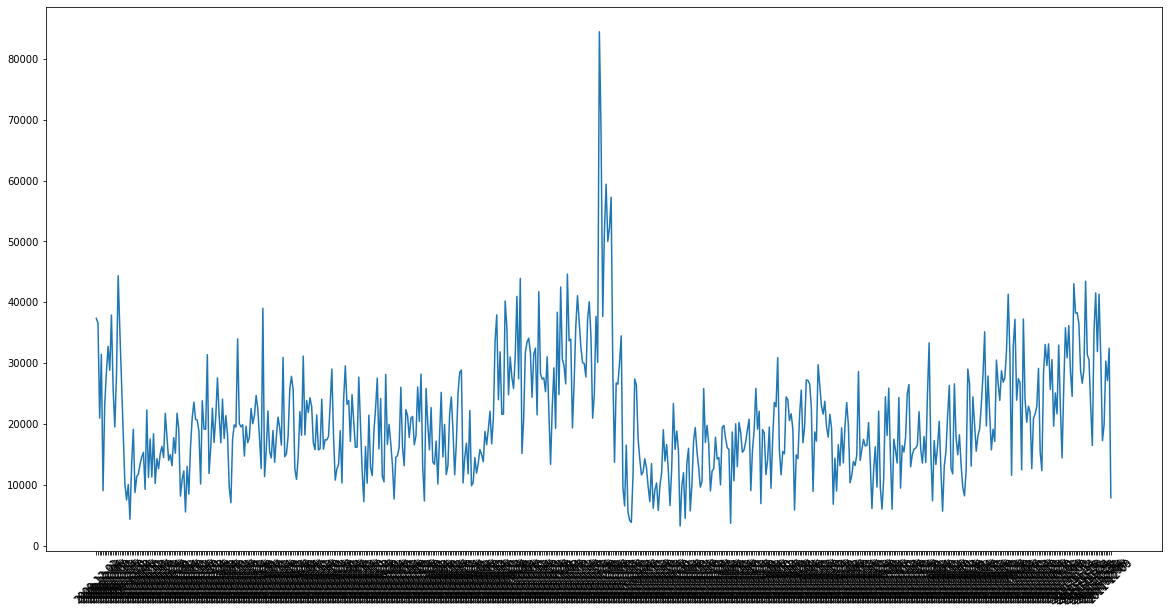

In [27]:
plt.figure(figsize=(20,10))
plt.plot(sales_day_filtered['date'], sales_day_filtered['total_amount'])
plt.xticks(rotation=45)
plt.show()

In [28]:
sales_day.to_pickle('../Data/sales_day.pkl')
sales_day_filtered.to_pickle('../Data/sales_day_filtered.pkl')